# Train test split


In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

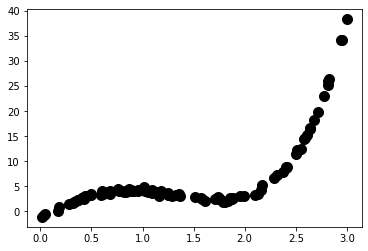

In [9]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10)
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [11]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [12]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([17.56467437,  4.16567655, 17.69844334,  6.33545716,  7.01384872,
        4.20472905, 25.04117271, 10.75273653,  4.10696037,  1.7925408 ,
        3.74878233, 25.36705755, 20.2138313 ,  2.4323146 ,  1.72869822,
        2.64727621,  1.53767488,  7.18967784,  2.8803334 ,  2.26327257,
        9.83801555,  2.84424094, 14.39544856, 14.37941242,  5.94967458,
       10.19054482, 18.61084056, 13.00170885,  5.59408458,  1.49530766,
       12.54488656,  1.61490279,  2.66336807,  2.8029166 , 17.00669592,
        2.26480192, 16.16767972,  1.92332183, 16.35967897, 19.40817061])

In [13]:
def printScore(y_test,model):
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    print()
printScore(y_test,model2)

Explained variance score: 0.7740544411873567
Explained variance score: 0.7740544411873567
Median absolute error: 2.9748740627183103
Mean squared error: 16.215967778478905
Mean absolute errors: 3.299987057012366



# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [14]:
model1 = make_pipeline(linear_model.LinearRegression())
model1.fit(X_train, y_train)
model1.predict(X_test)
printScore(y_test,model1)

model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)
printScore(y_test,model2)

model3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model3.fit(X_train, y_train)
model3.predict(X_test)
printScore(y_test,model3)

model5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())
model5.fit(X_train, y_train)
model5.predict(X_test)
printScore(y_test,model5)

model25 = make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression())
model25.fit(X_train, y_train)
model25.predict(X_test)
printScore(y_test,model25)


Explained variance score: 0.49731623317254814
Explained variance score: 0.49731623317254814
Median absolute error: 3.0238142953158738
Mean squared error: 32.75602434219162
Mean absolute errors: 4.347811464632118

Explained variance score: 0.7740544411873567
Explained variance score: 0.7740544411873567
Median absolute error: 2.9748740627183103
Mean squared error: 16.215967778478905
Mean absolute errors: 3.299987057012366

Explained variance score: 0.9869632192824476
Explained variance score: 0.9869632192824476
Median absolute error: 0.8114651866940252
Mean squared error: 0.8704304313980298
Mean absolute errors: 0.8096734883715092

Explained variance score: 0.998305341653285
Explained variance score: 0.998305341653285
Median absolute error: 0.2041056484040844
Mean squared error: 0.10685248142783613
Mean absolute errors: 0.25360914146771324

Explained variance score: 0.7258309680582637
Explained variance score: 0.7258309680582637
Median absolute error: 0.26408446808581365
Mean squared err